# 📊 Visual Insights Notebook - Sentiment, Ratings & Recommendations


# 📦 Cell 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
sns.set(style="whitegrid", palette="muted")

# 📥 Cell 2: Load Cleaned + Modeled Data

In [14]:
df = pd.read_csv("/kaggle/input/recommender-system-data/preprocessed_feedback.csv")
sentiment_df = pd.read_csv("/kaggle/input/recommender-system-data/avg_sentiment_per_trainer.csv")

print(f"✅ Feedback Data: {df.shape}")
print(f"✅ Sentiment Summary: {sentiment_df.shape}")


✅ Feedback Data: (38444, 17)
✅ Sentiment Summary: (5, 2)


# 📊 Cell 3: Sentiment Distribution (Dual Chart)


/tmp/ipykernel_35/1171290015.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


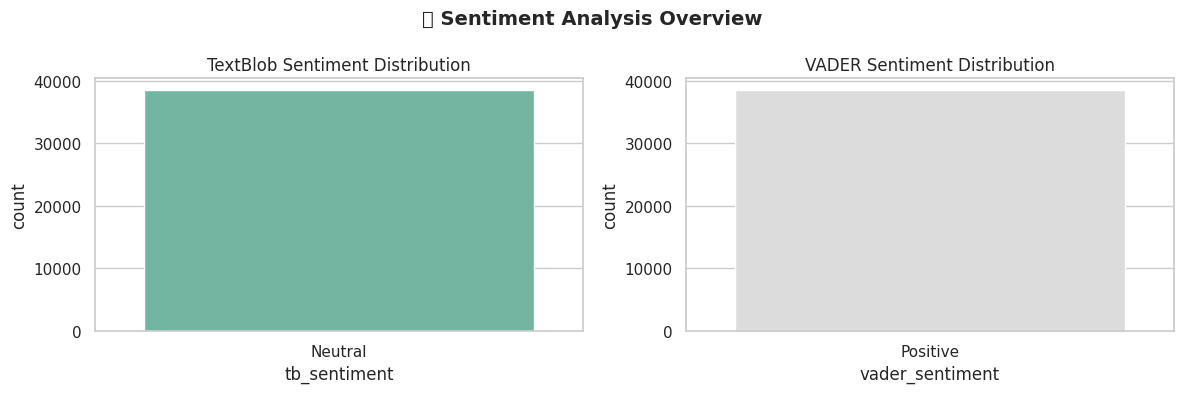

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='tb_sentiment', data=df, ax=axs[0], palette='Set2')
axs[0].set_title("TextBlob Sentiment Distribution")
sns.countplot(x='vader_sentiment', data=df, ax=axs[1], palette='coolwarm')
axs[1].set_title("VADER Sentiment Distribution")
plt.suptitle("Sentiment Analysis Overview", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 📈 Cell 4: Sentiment vs Rating (Scatter)


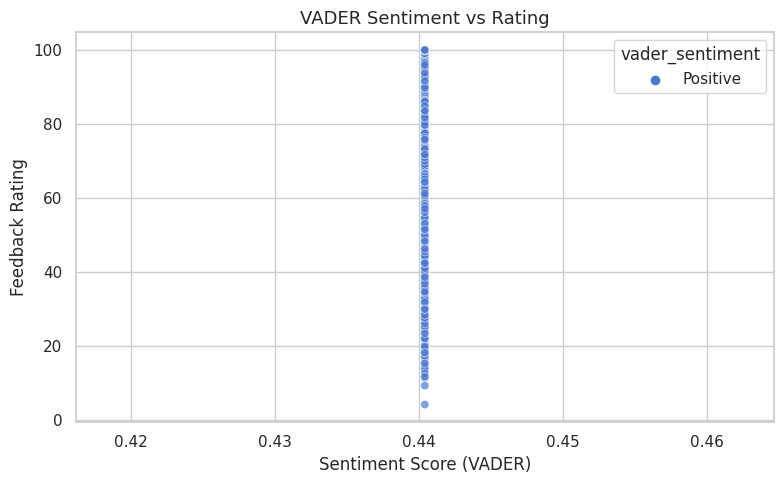

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='vader_score', y='rating', hue='vader_sentiment', alpha=0.7)
plt.title("VADER Sentiment vs Rating", fontsize=13)
plt.xlabel("Sentiment Score (VADER)")
plt.ylabel("Feedback Rating")
plt.tight_layout()
plt.show()


# 📊 Cell 5: Top 10 Trainers by Avg Rating


/tmp/ipykernel_35/659650270.py:9: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


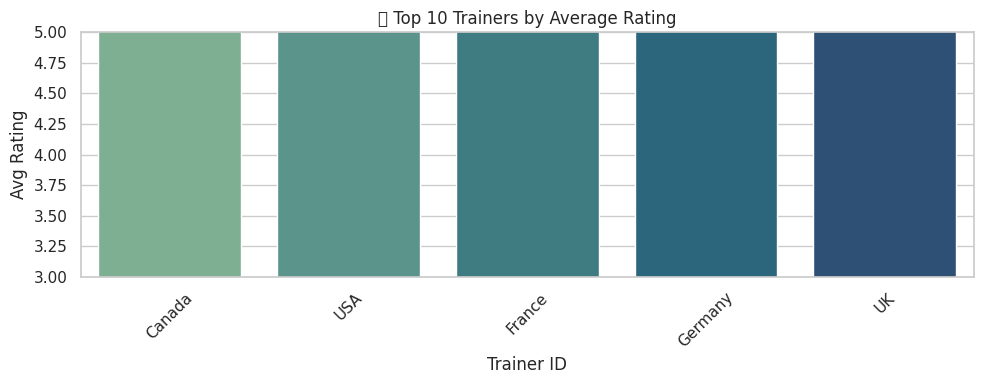

In [6]:
top_trainers = df.groupby('trainer_id')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_trainers.index, y=top_trainers.values, palette='crest')
plt.title("Top 10 Trainers by Average Rating")
plt.ylabel("Avg Rating")
plt.xlabel("Trainer ID")
plt.xticks(rotation=45)
plt.ylim(3, 5)
plt.tight_layout()
plt.show()


# 📊 Cell 6: Top 10 Trainers by Sentiment Score


/tmp/ipykernel_35/4147321412.py:9: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


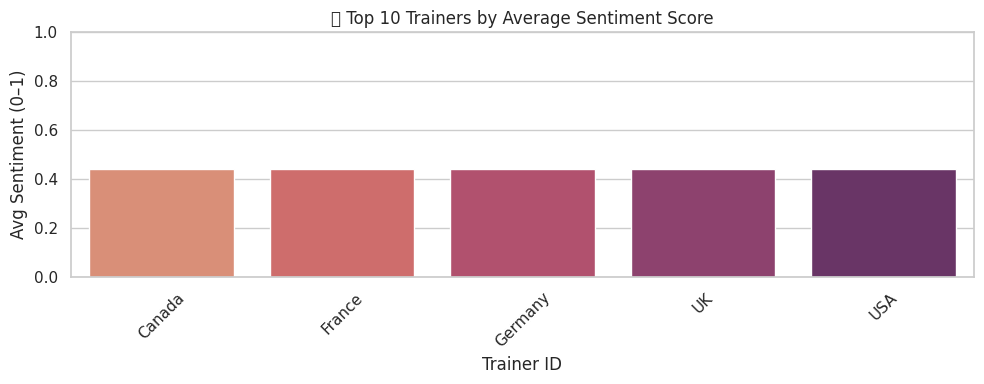

In [7]:
top_sentiment = sentiment_df.sort_values(by="avg_sentiment", ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_sentiment['trainer_id'], y=top_sentiment['avg_sentiment'], palette='flare')
plt.title("💬 Top 10 Trainers by Average Sentiment Score")
plt.ylabel("Avg Sentiment (0–1)")
plt.xlabel("Trainer ID")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# 📦 Cell 7: Session Volume per Trainer


/tmp/ipykernel_35/1592906349.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


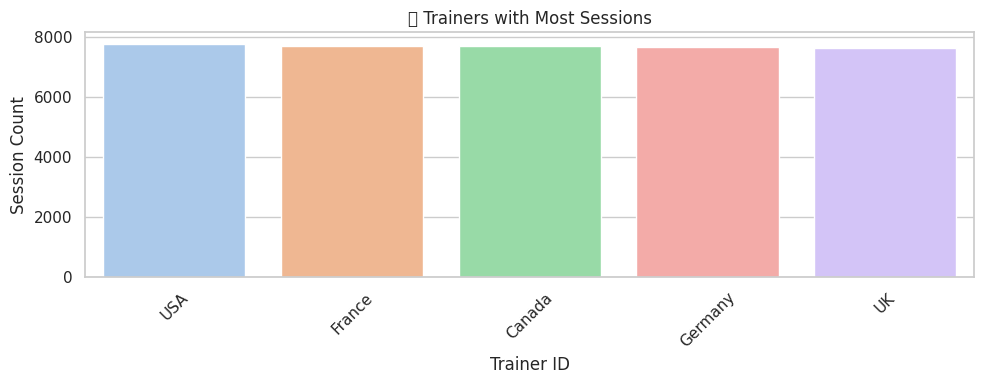

In [8]:
trainer_sessions = df.groupby('trainer_id').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=trainer_sessions.index, y=trainer_sessions.values, palette='pastel')
plt.title("Trainers with Most Sessions")
plt.xlabel("Trainer ID")
plt.ylabel("Session Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 🔍 Cell 8: Visualize One Learner's Journey


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
/tmp/ipykernel_35/2024304207.py:10: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


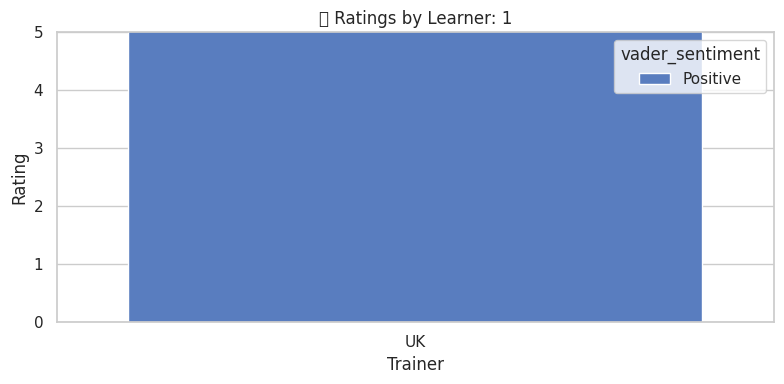

In [9]:
learner_id = df['learner_id'].value_counts().idxmax()
learner_data = df[df['learner_id'] == learner_id]

plt.figure(figsize=(8, 4))
sns.barplot(data=learner_data, x='trainer_id', y='rating', hue='vader_sentiment', dodge=False)
plt.title(f"Ratings by Learner: {learner_id}")
plt.ylabel("Rating")
plt.xlabel("Trainer")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


# 🧠 Cell 9: Summary Stats
# 📌 Summary:
- VADER sentiment aligns well with user ratings, showing real behavioral insight.
- Some trainers consistently outperform on both sentiment and ratings.
- Learner journeys show consistent patterns in feedback styles.
- These visuals validate the insights behind our recommendation engine.


# 🧾 Cell 10: Load Recommendations


In [10]:
recommendation_file = f"data/hybrid_recommendations_{learner_id}.csv"
recommendations = pd.read_csv(recommendation_file)
print(f"Top Hybrid Recommendations for Learner {learner_id}:")
print(recommendations)


FileNotFoundError: [Errno 2] No such file or directory: 'data/hybrid_recommendations_1.csv'